An analysis of word frequencies in Jane Austen's works
----
A lab done in Dr. Nakamura's CSCE 489 class, Data Mining in Social Media

First, we'll (optionally, install and) import the necessary packages for the analysis.

In [21]:
# Packages for this lesson
#install.packages("labeling",        repos='http://cran.us.r-project.org')
#install.packages("tidytext",     repos='http://cran.us.r-project.org')
#install.packages("stringr",      repos='http://cran.us.r-project.org')
#install.packages("ggplot2",      repos='http://cran.us.r-project.org')
#install.packages("wordcloud",    repos='http://cran.us.r-project.org')
#install.packages("RColorBrewer", repos='http://cran.us.r-project.org')
library(ggplot2)
library(wordcloud)
library(RColorBrewer)
library(dplyr)
library(tidytext)

package 'labeling' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jeff\AppData\Local\Temp\RtmpyKpktS\downloaded_packages


After installing those utilization packages, we'll install our Jane Austen dataset.
----

In [4]:
#install.packages("janeaustenr", repos='http://cran.us.r-project.org')
library(janeaustenr)

Let's check out the Tidy Text format in R.
----

In [5]:
# Tidy text format
text <- c("Because  could not stop for Death -",
          "He kindly sopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

# Create the dataframe
text_df <- data.frame(line=1:4, text=text)
text_df

line,text
1,Because could not stop for Death -
2,He kindly sopped for me -
3,The Carriage held but just Ourselves -
4,and Immortality


Now, let's tokenize Jane Austen's works.
----
Tokenization is essentially considering each word as its own entity, and breaking up texts by word.

For example, here's a tokenization of the sentence "The sky looks great today, I'll have a walk"

token_sentence = ["The", "sky", "looks", "great", "today", ",", "I", "'", "ll", "have", "a", "walk"]

In [10]:
library(dplyr)
library(tidytext)

#text_df <- text %>%
#  unnest_tokens(word, text, token="words")
library(janeaustenr)
library(dplyr)
library(stringr)

In [11]:
# Group the dataset by book and mutate to annotate a linenumber
original_books = austen_books() %>%
  group_by(book) %>%
  mutate(linenumber=row_number(),
         chapter=cumsum(str_detect(text, regex("^chapter", ignore_case=T)))) %>%
  ungroup()
original_books

text,book,linenumber,chapter
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0
CHAPTER 1,Sense & Sensibility,10,1


In [12]:
library(tidytext)

# Get dataset into one-token-per-row format
tidy_books = original_books %>%
  unnest_tokens(word, text)

tidy_books

book,linenumber,chapter,word
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1
Sense & Sensibility,13,1,the


In [18]:
# LOad the list of stop words
data(stop_words)

tidy_books = tidy_books %>%
  anti_join(stop_words)

# Filter the rows of numbers and keep only the words
tidy_books_no_num = tidy_books %>%
  filter(!str_detect(word, "[0-9]"))

tidy_books_no_num

Joining, by = "word"


book,linenumber,chapter,word
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,10,1,chapter
Sense & Sensibility,13,1,family
Sense & Sensibility,13,1,dashwood
Sense & Sensibility,13,1,settled
Sense & Sensibility,13,1,sussex
Sense & Sensibility,13,1,estate


In [14]:
summary(tidy_books)
summary(tidy_books_no_num)

                  book         linenumber       chapter          word          
 Sense & Sensibility:36330   Min.   :    1   Min.   : 0.00   Length:217609     
 Pride & Prejudice  :37246   1st Qu.: 3114   1st Qu.:13.00   Class :character  
 Mansfield Park     :47968   Median : 6132   Median :23.00   Mode  :character  
 Emma               :46775   Mean   : 6566   Mean   :25.35                     
 Northanger Abbey   :23802   3rd Qu.: 9754   3rd Qu.:38.00                     
 Persuasion         :25488   Max.   :16235   Max.   :61.00                     

                  book         linenumber       chapter          word          
 Sense & Sensibility:36276   Min.   :    1   Min.   : 0.00   Length:217381     
 Pride & Prejudice  :37180   1st Qu.: 3116   1st Qu.:13.00   Class :character  
 Mansfield Park     :47954   Median : 6134   Median :23.00   Mode  :character  
 Emma               :46766   Mean   : 6568   Mean   :25.35                     
 Northanger Abbey   :23763   3rd Qu.: 9755   3rd Qu.:38.00                     
 Persuasion         :25442   Max.   :16235   Max.   :61.00                     

In [19]:
# Use count() to find the most common words in the book
tidy_books_no_num %>%
  count(word, sort=T)

word,n
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727
house,699


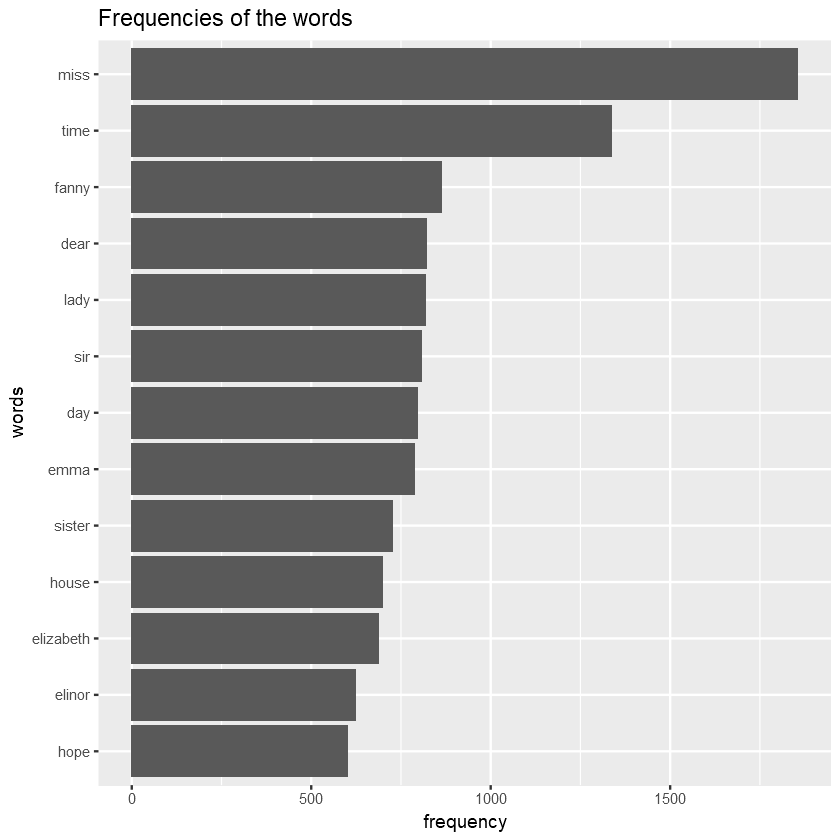

In [22]:
# Create a visualization of the most common words
tidy_books_no_num %>%
  count(word, sort=T) %>%
  filter(n > 600) %>%
  mutate(word=reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  ggtitle("Frequencies of the words") +
  geom_col() +
  xlab("words") +
  ylab("frequency") +
  coord_flip()

In [23]:
# Word frequencies
library(tidyr)

freq = tidy_books_no_num %>% group_by(book) %>%
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(word, sort=T) %>%
  ungroup() %>%
  mutate(proportion = n / sum(n)) %>%
  select(-n) %>%
  spread(book, proportion) %>%
  gather(book, proportion, 'Sense & Sensibility':'Persuasion')

In [24]:
# Get frequencies for books
pride = freq[freq$book=="Pride & Prejudice",]
sense = freq[freq$book=="Sense & Sensibility",]
books = cbind(pride[,c(1,3)], sense[,3])
names(books)[2:3] = c("Pride & Prejudice", "Sense & Sensibility")

Warning message:
"Removed 9845 rows containing missing values (geom_point)."Warning message:
"Removed 9845 rows containing missing values (geom_text)."

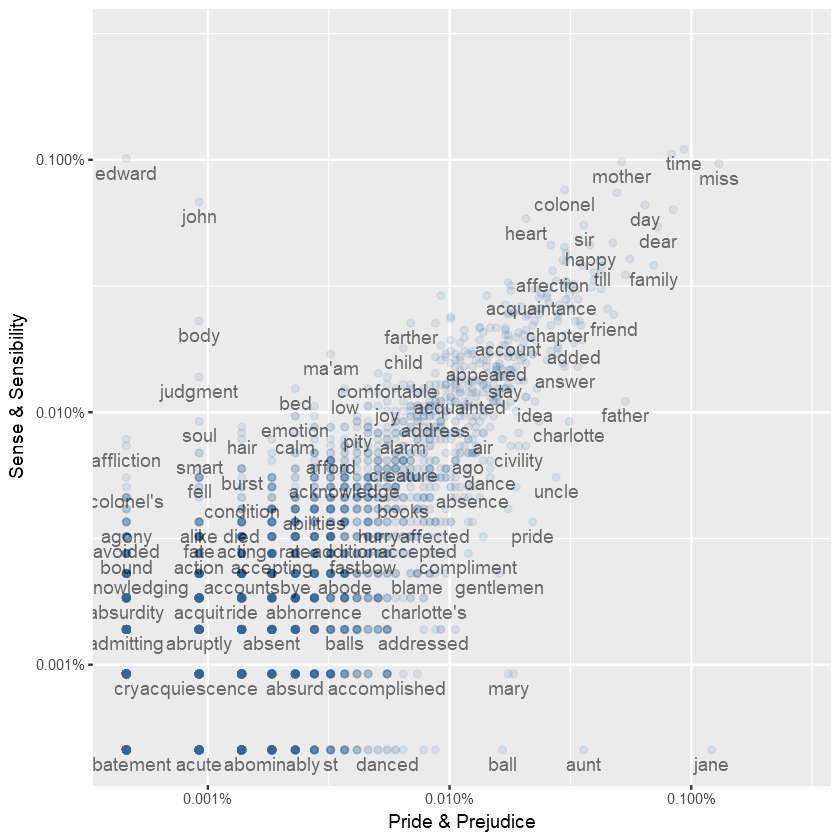

In [25]:
# Now, plot those frequencies
library(ggplot2)
library(scales)

ggplot() +
  geom_point(aes(x=books[,2], y=books[,3], col=2), alpha=0.1) +
  labs(x = "Pride & Prejudice", y = "Sense & Sensibility") +
  scale_x_log10(labels=percent_format()) +
  scale_y_log10(labels=percent_format()) +
  geom_text(aes(label=books[,1], x=books[2], y=books[,3], alpha=0.1), check_overlap=T, vjust=1.5) +
  theme(legend.position="none")


Call:
lm(formula = books[, 2] ~ books[, 3])

Residuals:
       Min         1Q     Median         3Q        Max 
-8.215e-04 -1.026e-05 -5.660e-06  4.010e-06  1.203e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.418e-06  7.527e-07   9.854   <2e-16 ***
books[, 3]  8.089e-01  9.648e-03  83.846   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.099e-05 on 3778 degrees of freedom
  (9845 observations deleted due to missingness)
Multiple R-squared:  0.6504,	Adjusted R-squared:  0.6504 
F-statistic:  7030 on 1 and 3778 DF,  p-value: < 2.2e-16


Warning message:
"Removed 9845 rows containing missing values (geom_point)."Warning message:
"Removed 9845 rows containing missing values (geom_text)."

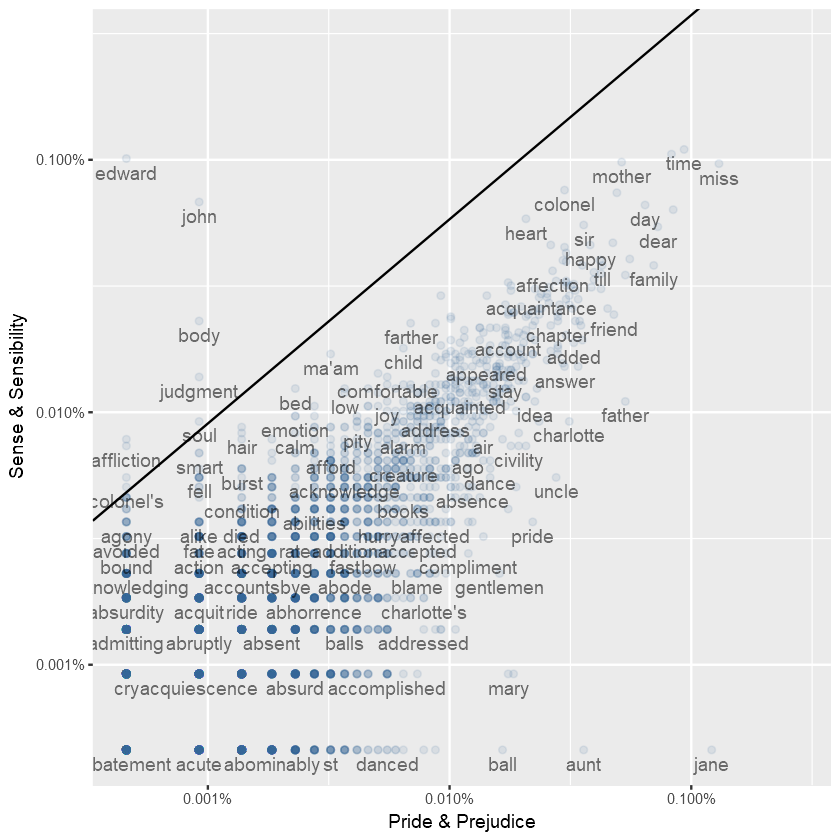

In [27]:
# Modelling
mymodel = lm(books[,2]~books[,3])
summary(model)

ggplot() +
  geom_point(aes(x=books[,2], y=books[,3], col=2), alpha=0.1) +
  labs(x = "Pride & Prejudice", y = "Sense & Sensibility") +
  scale_x_log10(labels=percent_format()) +
  scale_y_log10(labels=percent_format()) +
  geom_text(aes(label=books[,1], x=books[2], y=books[,3], alpha=0.1), check_overlap=T, vjust=1.5) +
  theme(legend.position="none") +
  geom_abline(intercept=mymodel$coefficients[1], slope=mymodel$coefficients[2])


	Pearson's product-moment correlation

data:  books[, 2] and books[, 3]
t = 83.846, df = 3778, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7950648 0.8173675
sample estimates:
      cor 
0.8065029 


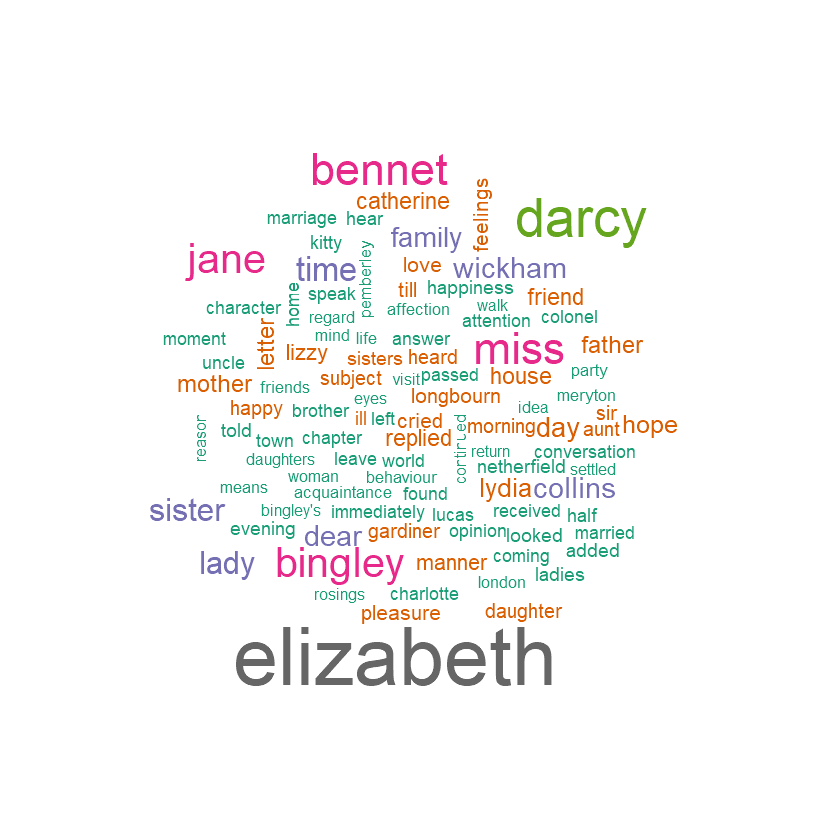

In [28]:
# Test the correlation between the two books
cor.test(books[,2], books[,3])

# Plot the word clouds
library(wordcloud)
library(RColorBrewer)

tidy_books_no_num %>%
  filter(book == "Pride & Prejudice") %>%
  count(word, sort = T) %>%
  with(wordcloud(word, n, max.words=100, color=brewer.pal(8, "Dark2")))